In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2 as cv

In [3]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')



In [4]:
signs = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

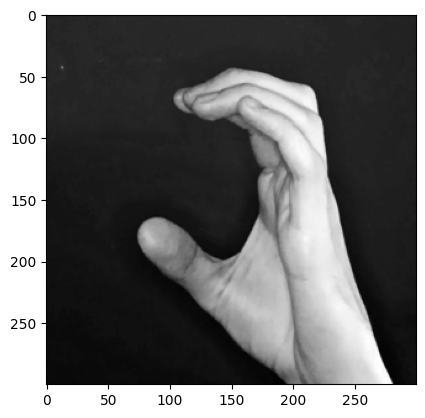

(1, 300, 300)


In [ ]:
img = image.load_img(f"../images/signs/C.jpg")
img_open = image.img_to_array(img)
img = cv.cvtColor(img_open, cv.COLOR_BGR2GRAY)
img = cv.GaussianBlur(img, (15, 15), 0) # Aplicar blur
img = cv.morphologyEx(img, cv.MORPH_OPEN, np.ones((5, 5), np.uint8)) # Aplicar erosión
img = cv.resize(img, (56, 56))
# img = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]
plt.imshow(img.astype(np.uint8), cmap='gray')
plt.show()
img = img.reshape((1,) + img.shape)
print(img.shape)

In [ ]:
num_samples = 1000
df_final = pd.DataFrame()
for sign in signs:
    aumented_images = []
    aumented_labels = []
    if sign == "J" or sign == "Z":
        continue
    img = image.load_img(f"../images/{sign}.jpg") # Cargar imagen
    img = image.img_to_array(img) # Convertir a array
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convertir a escala de grises
    img = cv.GaussianBlur(img, (5, 5), 0) # Aplicar blur
    img = cv.morphologyEx(img, cv.MORPH_OPEN, np.ones((3, 3), np.uint8)) # Aplicar erosión
    img = cv.resize(img, (56, 56)) # Redimensionar
    img = img.reshape((1,) + img.shape) # Convertir a una matriz
    img = np.expand_dims(img, axis=-1) # Agregar una dimensión
    for batch in datagen.flow(img, batch_size=1): #, save_to_dir="../images", save_prefix="batch"):
        aug_img = batch[0].astype(np.uint8).flatten()
        aumented_images.append(aug_img)
        aumented_labels.append(signs.index(sign))
        if len(aumented_images) >= num_samples:
            break
    df = pd.DataFrame(aumented_images)
    df.insert(0, "label", aumented_labels)
    df_final = pd.concat([df_final,df], axis=0)
    
df_final.to_csv("../data/sign_mnist_.csv", index=False)

# 5min 43seg

In [163]:
df = pd.read_csv("../data/sign_mnist.csv")
df.head()
df.shape

(24000, 3137)

(56, 56)


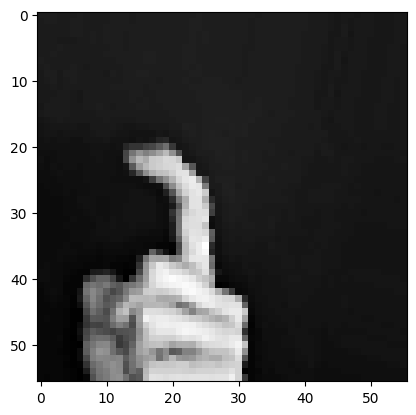

In [156]:

print(df.drop(columns=["label"]).sample(1).values.reshape(56, 56).shape)
plt.show()
plt.imshow(df.drop(columns=["label"]).sample(1).values.reshape(56, 56), "gray")